<a href="https://colab.research.google.com/github/chetan110801/CoffeeSalesAnalysis/blob/main/imbalance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
from google.colab import files

# This will prompt you to upload the file
uploaded = files.upload()

# Assuming your file is named 'data.csv'
import pandas as pd
df = pd.read_csv("customer_churn.csv")
df.sample(5)

Saving customer_churn.csv to customer_churn.csv


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3809,9602-WCXPI,Male,0,No,No,50,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),20.15,989.05,No
6939,2758-RNWXS,Male,0,No,No,35,Yes,No,Fiber optic,Yes,...,No,Yes,No,Yes,One year,Yes,Electronic check,89.20,3251.3,No
6351,1842-EZJMK,Male,0,Yes,Yes,50,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,Month-to-month,No,Electronic check,103.70,5071.05,Yes
6496,2474-BRUCM,Male,1,Yes,No,40,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,101.85,4086.3,Yes
1116,8461-EFQYM,Female,0,No,No,38,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Electronic check,24.25,914.4,No


In [4]:
df.drop('customerID',axis='columns',inplace=True)

In [5]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

,TotalCharges
0,False
1,False
2,False
3,False
4,False
...,...
7038,False
7039,False
7040,False
7041,False


In [6]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [7]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [8]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)
df1.TotalCharges.values

<ipython-input-8-4444e55674a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

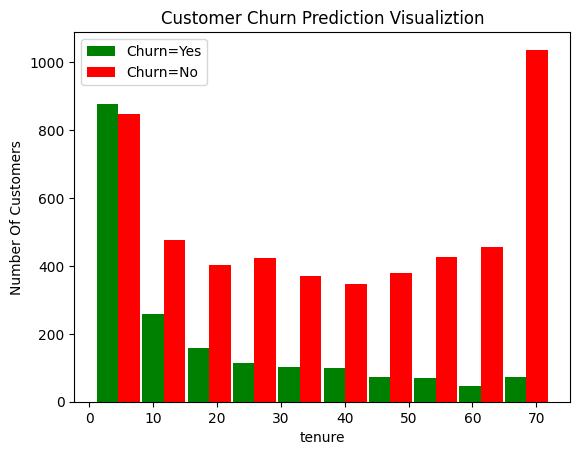

In [9]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

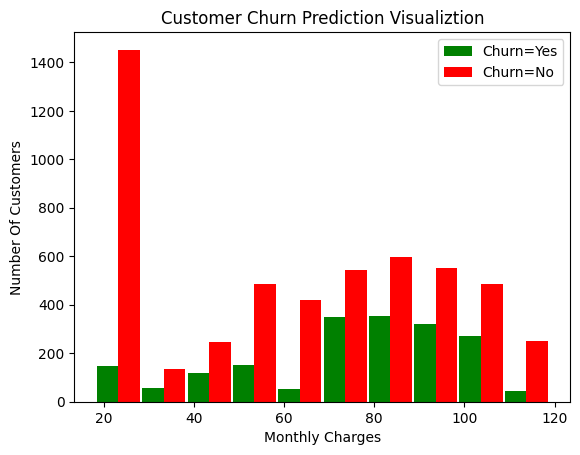

In [10]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [11]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [12]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

<ipython-input-12-104b877f3854>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
<ipython-input-12-104b877f3854>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [13]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

<ipython-input-13-34dfac0bf179>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].replace({'Yes': 1,'No': 0},inplace=True)
<ipython-input-13-34dfac0bf179>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[col].replace({'Yes': 1,'No': 0},inplace=True)
<ipython-input-13-34dfac0bf179>:4: Set

In [14]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [15]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

<ipython-input-15-ba153b6b6960>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['gender'].replace({'Female':1,'Male':0},inplace=True)
<ipython-input-15-ba153b6b6960>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)
<ipython-input-15-ba15

In [16]:
df1.gender.unique()

array([1, 0])

In [17]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [18]:
# 1. Identify the boolean columns
bool_cols = df2.select_dtypes(include='bool').columns

# 2. Convert the boolean columns to integers
df2[bool_cols] = df2[bool_cols].astype(int)

In [19]:
df2.dtypes

,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
OnlineSecurity,int64
OnlineBackup,int64
DeviceProtection,int64


In [20]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [21]:
import pandas as pd
from sklearn.utils import resample

# Separate the majority class (Churn = 0) and minority class (Churn = 1)
df_majority = df2[df2['Churn'] == 0]
df_minority = df2[df2['Churn'] == 1]

# Calculate target counts to achieve 95% majority to 5% minority ratio
desired_ratio = 0.05
target_minority_count = int(len(df_majority) * desired_ratio / (1 - desired_ratio))

# Down-sample the minority class
df_minority_downsampled = resample(df_minority,
                                   replace=False,  # sample without replacement
                                   n_samples=target_minority_count,  # target count
                                   random_state=42)  # reproducibility

# Combine the majority class with the down-sampled minority class
df_balanced = pd.concat([df_majority, df_minority_downsampled])

# Shuffle the dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the new class distribution
class_distribution = df_balanced['Churn'].value_counts(normalize=True) * 100
class_distribution

,proportion
Churn,
0,95.012882
1,4.987118


In [22]:
X = df_balanced.drop('Churn',axis='columns')
y = testLabels = df_balanced.Churn.astype(np.float32)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=15, stratify=y)

In [23]:
y_train.value_counts()

,count
Churn,
0.0,4646
1.0,244


In [24]:
y.value_counts()

,count
Churn,
0.0,5163
1.0,271


In [25]:
y_test.value_counts()

,count
Churn,
0.0,517
1.0,27


In [26]:
X_train.shape

(4890, 26)

In [27]:
X_test.shape

(544, 26)

In [28]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2196,1,0,1,0,0.971831,1,1,0,1,1,...,1,0,0,0,0,1,1,0,0,0
1743,1,0,0,0,0.845070,0,0,1,1,1,...,1,0,0,0,1,0,0,1,0,0
905,1,0,0,0,0.126761,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
1335,1,0,1,1,0.661972,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
2552,0,0,0,0,0.042254,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
302,0,0,0,0,0.028169,1,0,0,0,1,...,0,1,0,1,0,0,0,0,0,1
2034,0,0,0,0,0.084507,1,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
5064,1,0,0,0,0.140845,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
4887,1,0,1,0,0.971831,0,0,0,1,1,...,1,0,0,0,0,1,1,0,0,0
396,0,0,0,0,0.323944,1,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0


In [29]:
!pip install imbalance-xgboost
!pip install CatBoost
!pip install xlsxwriter  # For writing Excel files

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 4.2 MB/s eta 0:00:00


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Machine Learning Libraries
from xgboost import DMatrix, train as xgb_train, XGBClassifier
from imxgboost.imbalance_xgb import imbalance_xgboost as imb_xgb
import lightgbm as lgb
from lightgbm import LGBMClassifier, Dataset as lgbDataset
from catboost import CatBoostClassifier, Pool

from sklearn.model_selection import GridSearchCV, ParameterGrid, train_test_split
from sklearn.metrics import (
    precision_score, recall_score, f1_score, accuracy_score, roc_auc_score,
    confusion_matrix, classification_report, make_scorer
)
from sklearn.datasets import make_classification
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler

from scipy import special, optimize

from collections import Counter

from google.colab import files
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [31]:
# Reset the index for X_train and y_train if necessary
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# Define thresholds to evaluate
thresholds = [0.3, 0.4, 0.5]

# Initialize a list to store the results for each model
results = []

In [46]:
# Modify evaluate_model_at_thresholds to return the average F1 score or another metric
def evaluate_model_at_thresholds(y_true, y_prob, model_name):
    results = []
    thresholds = [0.3, 0.4, 0.5]  # Example thresholds

    for threshold in thresholds:
        y_pred = (y_prob >= threshold).astype(int)

        precision = precision_score(y_true, y_pred, zero_division=0)
        recall = recall_score(y_true, y_pred, zero_division=0)
        f1 = f1_score(y_true, y_pred, zero_division=0)
        accuracy = accuracy_score(y_true, y_pred)
        roc_auc = roc_auc_score(y_true, y_prob)

        # Store the results for later use
        results.append({
            'Model': model_name,
            'Threshold': threshold,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'Accuracy': accuracy,
            'ROC AUC': roc_auc
        })

    # Return the average F1 score across all thresholds (you can change this to another metric)
    avg_f1 = np.mean([result['F1 Score'] for result in results])
    return avg_f1

In [33]:
# Train Standard XGBoost Model
# Initialize the XGBoost classifier
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict class labels
y_pred = xgb_model.predict(X_test)

# Predict probabilities
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc)

# Evaluate model
evaluate_model_at_thresholds(y_test, y_pred_proba, "Standard XGBoost")

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.97       517
         1.0       0.38      0.11      0.17        27

    accuracy                           0.95       544
   macro avg       0.67      0.55      0.57       544
weighted avg       0.93      0.95      0.93       544

Confusion Matrix:
 [[512   5]
 [ 24   3]]
ROC AUC Score: 0.7946844329823053


In [34]:
# Train Standard XGBoost Model with scale_pos_weight
# Calculate initial scale_pos_weight
counter = Counter(y_train)
initial_scale_pos_weight = counter[0.0] / counter[1.0]

# Define parameter grid for scale_pos_weight
param_grid = {
    'scale_pos_weight': [initial_scale_pos_weight * 0.5, initial_scale_pos_weight, initial_scale_pos_weight * 1.5, initial_scale_pos_weight * 2.0]
}

# Initialize the XGBoost classifier
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Use GridSearchCV to find the best scale_pos_weight
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='f1',  # Optimizing for F1 score to balance precision and recall
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit the model using grid search
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Predict class labels using the best model
y_pred = best_model.predict(X_test)

# Predict probabilities using the best model
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Classification report
print("Best Model Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Best Model Confusion Matrix:\n", cm)

# ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("Best Model ROC AUC Score:", roc_auc)

# Evaluate model
evaluate_model_at_thresholds(y_test, y_pred_proba, "XGBoost with scale_pos_weight")

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Model Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.95      0.96       517
         1.0       0.20      0.22      0.21        27

    accuracy                           0.92       544
   macro avg       0.58      0.59      0.58       544
weighted avg       0.92      0.92      0.92       544

Best Model Confusion Matrix:
 [[493  24]
 [ 21   6]]
Best Model ROC AUC Score: 0.831793108388853


In [35]:
# Train Imbalance XGBoost Model
# Reset index for X_train and y_train
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# Convert to NumPy arrays
X_train_np = X_train.values
y_train_np = y_train.values
X_test_np = X_test.values
y_test_np = y_test.values

# Initialize the imbalance XGBoost classifier with a base configuration for focal loss
xgboster_focal = imb_xgb(special_objective='focal')

# Set the parameters for grid search on focal_gamma and imbalance_alpha to increase recall for class 1
params_focal = {
    'focal_gamma': [1.0, 1.5, 2.0, 2.5, 3.0],  # Higher focal gamma to focus more on the minority class
    'imbalance_alpha': [1.5, 2.0, 2.5, 3.0, 4.0]  # Different levels of imbalance handling
}

# Perform Grid Search with Cross Validation for focal loss booster
CV_focal_booster = GridSearchCV(xgboster_focal, params_focal, cv=3)
CV_focal_booster.fit(X_train_np, y_train_np)

# Best model from Grid Search with focal loss
best_focal_model = CV_focal_booster.best_estimator_

# Predict class labels using the best focal model
y_pred_focal = best_focal_model.predict(X_test_np)

# Predict outputs
y_pred_sigmoid_output = best_focal_model.predict_sigmoid(X_test_np)  # Sigmoid output
y_pred_class_output = best_focal_model.predict_determine(X_test_np)  # Class determination output
y_pred_prob_output = best_focal_model.predict_two_class(X_test_np)  # Probabilities of two classes

# Convert predictions to binary values using an appropriate threshold
threshold = 0.5  # Adjust threshold if needed to improve recall
y_pred_focal_binary = (y_pred_prob_output[:, 1] > threshold).astype(int)

# Classification report for Imbalance XGBoost model
print("Imbalance XGBoost Model - Classification Report:\n", classification_report(y_test_np, y_pred_focal_binary))

# Confusion matrix for Imbalance XGBoost model
cm_focal = confusion_matrix(y_test_np, y_pred_focal_binary)
print("Imbalance XGBoost Model - Confusion Matrix:\n", cm_focal)

# ROC AUC score
roc_auc = roc_auc_score(y_test_np, y_pred_focal_binary)
print("Best Model ROC AUC Score:", roc_auc)

# Evaluate model
evaluate_model_at_thresholds(y_test_np, y_pred_focal_binary, "Imbalance XGBoost Model")

Imbalance XGBoost Model - Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       517
         1.0       0.25      0.04      0.06        27

    accuracy                           0.95       544
   macro avg       0.60      0.52      0.52       544
weighted avg       0.92      0.95      0.93       544

Imbalance XGBoost Model - Confusion Matrix:
 [[514   3]
 [ 26   1]]
Best Model ROC AUC Score: 0.5156171645533347


In [47]:
from sklearn.model_selection import GridSearchCV
from xgboost import DMatrix, train as xgb_train
import numpy as np
from scipy import special
from sklearn.model_selection import train_test_split

# Define FocalLoss class as before
class FocalLoss:
    def __init__(self, gamma=2.0):
        self.gamma = gamma

    def grad(self, y_true, y_pred):
        p = y_pred
        grad = (p - y_true) * (self.gamma * y_true * (1 - p) ** (self.gamma - 1) * np.log(np.maximum(p, 1e-8)) + (1 - y_true) * p ** (self.gamma - 1))
        return grad

    def hess(self, y_true, y_pred):
        p = y_pred
        hess = (self.gamma * (y_true * (1 - p) ** (self.gamma - 1) - (1 - y_true) * p ** (self.gamma - 1)) * ((y_true - p) ** 2) * np.log(np.maximum(p, 1e-8)) +
                (p - y_true) ** 2 * (self.gamma * (self.gamma - 1) * (y_true * (1 - p) ** (self.gamma - 2) - (1 - y_true) * p ** (self.gamma - 2))))
        return hess

    def __call__(self, y_true, y_pred):
        p = y_pred
        focal_loss = -y_true * (1 - p) ** self.gamma * np.log(np.maximum(p, 1e-8)) - (1 - y_true) * p ** self.gamma * np.log(np.maximum(1 - p, 1e-8))
        return focal_loss

# Custom objective for XGBoost with Focal Loss
def focal_loss_xgb(y_pred, dtrain, gamma=2):
    y_true = dtrain.get_label()
    fl = FocalLoss(gamma=gamma)
    grad = fl.grad(y_true, special.expit(y_pred))
    hess = fl.hess(y_true, special.expit(y_pred))
    return grad, hess

# Custom evaluation metric for XGBoost with Focal Loss
def focal_loss_xgb_eval(y_pred, dtrain, gamma=2):
    y_true = dtrain.get_label()
    fl = FocalLoss(gamma=gamma)
    loss = fl(y_true, special.expit(y_pred))
    return 'focal_loss', np.mean(loss)

# Wrapping the training process to use it with GridSearchCV
def train_with_focal_loss(params, dtrain, dtest, gamma):
    model = xgb_train(
        params=params,
        dtrain=dtrain,
        num_boost_round=1000,
        early_stopping_rounds=20,
        evals=[(dtrain, 'train'), (dtest, 'eval')],
        obj=lambda y_pred, dtrain: focal_loss_xgb(y_pred, dtrain, gamma=gamma),
        feval=lambda y_pred, dtrain: focal_loss_xgb_eval(y_pred, dtrain, gamma=gamma),
        verbose_eval=False
    )
    return model

# Define the parameters for grid search
params_focal = {
    'gamma': [1.0, 1.5, 2.0, 2.5, 3.0],  # Focal gamma tuning
    'imbalance_alpha': [1.5, 2.0, 2.5, 3.0, 4.0]  # Imbalance alpha tuning (can be applied separately)
}

# Prepare data
dtrain_xgb = DMatrix(X_train, label=y_train)
dtest_xgb = DMatrix(X_test, label=y_test)

# Use GridSearchCV to search over gamma
best_model = None
best_gamma = None
best_score = -np.inf

for gamma in params_focal['gamma']:
    print(f"Training with focal_gamma = {gamma}")

    # Train the model with the current gamma value
    model = train_with_focal_loss(params, dtrain_xgb, dtest_xgb, gamma)

    # Predict probabilities
    y_pred_focal_xgb = model.predict(dtest_xgb)

    # Evaluate the model using your custom evaluation function
    score = np.mean(evaluate_model_at_thresholds(y_test, y_pred_focal_xgb, f"XGBoost with Focal Loss (gamma={gamma})"))

    if score > best_score:
        best_score = score
        best_gamma = gamma
        best_model = model

# Display the best gamma and results
print(f"Best gamma: {best_gamma}")

Training with focal_gamma = 1.0
Training with focal_gamma = 1.5
Training with focal_gamma = 2.0
Training with focal_gamma = 2.5
Training with focal_gamma = 3.0
Best gamma: 1.5


In [36]:
## Train Standard CatBoost Model
# Calculate the class weights
num_pos = sum(y_train == 1)
num_neg = sum(y_train == 0)
class_weights = [num_pos / num_neg, 1.0]  # Assign higher weight to the minority class (class 1)

# Initialize the CatBoost classifier with class weights
catboost_model = CatBoostClassifier(
    random_state=42,
    class_weights=class_weights) # Set class weights manually

# Train the model
catboost_model.fit(X_train, y_train)

# Predict class labels
y_pred = catboost_model.predict(X_test)

# Predict probabilities
y_pred_proba = catboost_model.predict_proba(X_test)[:, 1]

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc)

# Evaluate model
evaluate_model_at_thresholds(y_test, y_pred_proba, "Standard CatBoost")

Learning rate set to 0.020289
0:	learn: 0.6816818	total: 50.6ms	remaining: 50.5s
1:	learn: 0.6706890	total: 58.7ms	remaining: 29.3s
2:	learn: 0.6610593	total: 65.7ms	remaining: 21.8s
3:	learn: 0.6515552	total: 72.3ms	remaining: 18s
4:	learn: 0.6417644	total: 81.8ms	remaining: 16.3s
5:	learn: 0.6330913	total: 86.6ms	remaining: 14.4s
6:	learn: 0.6225833	total: 91.1ms	remaining: 12.9s
7:	learn: 0.6146286	total: 97.7ms	remaining: 12.1s
8:	learn: 0.6072499	total: 106ms	remaining: 11.7s
9:	learn: 0.5999438	total: 110ms	remaining: 10.9s
10:	learn: 0.5931361	total: 118ms	remaining: 10.6s
11:	learn: 0.5850237	total: 123ms	remaining: 10.1s
12:	learn: 0.5783027	total: 129ms	remaining: 9.83s
13:	learn: 0.5725298	total: 136ms	remaining: 9.58s
14:	learn: 0.5650774	total: 143ms	remaining: 9.37s
15:	learn: 0.5589530	total: 149ms	remaining: 9.17s
16:	learn: 0.5535243	total: 156ms	remaining: 9.05s
17:	learn: 0.5476359	total: 163ms	remaining: 8.87s
18:	learn: 0.5420488	total: 169ms	remaining: 8.72s
19:	l

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, ClassifierMixin
from catboost import CatBoostClassifier, Pool
import numpy as np

from sklearn.metrics import f1_score, recall_score, precision_score, make_scorer

# Custom scoring function
def custom_metric(y_true, y_pred):
    f1 = f1_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    precision = precision_score(y_true, y_pred, zero_division=0)

    # Custom weighted score
    weighted_score = 0.3 * f1 + 0.5 * recall + 0.2 * precision
    return weighted_score

# Make it a valid scorer for GridSearchCV
custom_scorer = make_scorer(custom_metric)

# Define a custom CatBoost estimator to allow GridSearchCV
class CatBoostFocalWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, focal_gamma=1.0, focal_alpha=0.25, iterations=500, early_stopping_rounds=10, random_seed=42):
        self.focal_gamma = focal_gamma
        self.focal_alpha = focal_alpha
        self.iterations = iterations
        self.early_stopping_rounds = early_stopping_rounds
        self.random_seed = random_seed
        self.model = None

    def fit(self, X, y, eval_set=None):
        train_pool = Pool(X, y)
        eval_pool = Pool(eval_set[0], eval_set[1]) if eval_set is not None else None

        # Define the CatBoost model with Focal Loss
        self.model = CatBoostClassifier(
            loss_function=f'Focal:focal_gamma={self.focal_gamma};focal_alpha={self.focal_alpha}',
            eval_metric='F1',
            custom_loss=['AUC', 'Accuracy'],
            iterations=self.iterations,
            early_stopping_rounds=self.early_stopping_rounds,
            random_seed=self.random_seed,
            verbose=0
        )

        # Train the model
        self.model.fit(train_pool, eval_set=eval_pool, verbose=False)
        return self

    def predict_proba(self, X):
        return self.model.predict_proba(X)

    def predict(self, X):
        return self.model.predict(X)

# Define the parameter grid for focal_gamma and focal_alpha
param_grid = {
    'focal_gamma': [1.0, 2.0, 3.0, 4.0, 5.0],
    'focal_alpha': [0.1, 0.25, 0.5, 0.75, 0.9]
}

# Initialize the custom wrapper for CatBoost
catboost_focal_wrapper = CatBoostFocalWrapper()

# Use GridSearchCV to tune the parameters
grid_search = GridSearchCV(
    estimator=catboost_focal_wrapper,
    param_grid=param_grid,
    scoring=custom_scorer,
    cv=3,  # 3-fold cross-validation
    verbose=1,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train, eval_set=(X_test, y_test))

# Get the best estimator from the grid search
best_catboost_focal_model = grid_search.best_estimator_

# Predict probabilities using the best model
y_prob_cat_focal = best_catboost_focal_model.predict_proba(X_test)[:, 1]

# Evaluate the best model at different thresholds
evaluate_model_at_thresholds(y_test, y_prob_cat_focal, "Best CatBoost Focal Loss Model")

# Displaying the best results
print("Best Parameters:")
print(grid_search.best_params_)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
Best Parameters:
{'focal_alpha': 0.1, 'focal_gamma': 1.0}


In [49]:
from itertools import product
from catboost import CatBoostClassifier, Pool

# Define the correct ranges for focal_gamma and focal_alpha (imbalance_alpha in your previous definition)
focal_gamma_range = [1.0, 2.0, 3.0, 4.0, 5.0]
focal_alpha_range = [0.1, 0.25, 0.5, 0.75, 0.9]  # Valid range for focal_alpha is (0, 1)

# Initialize a list to store the tuning results
tuning_results = []

# Prepare the training and validation data for CatBoost
train_pool = Pool(X_train, y_train)
eval_pool = Pool(X_test, y_test)

# Loop over all combinations of focal_gamma and focal_alpha
for focal_gamma, focal_alpha in product(focal_gamma_range, focal_alpha_range):
    print(f"Training CatBoost with Focal Loss (focal_gamma={focal_gamma}, focal_alpha={focal_alpha})")

    # Define the CatBoost model with Focal Loss
    catboost_focal_model = CatBoostClassifier(
        loss_function=f'Focal:focal_gamma={focal_gamma};focal_alpha={focal_alpha}',  # Set gamma and alpha
        eval_metric='F1',
        custom_loss=['AUC', 'Accuracy'],
        random_seed=42,
        iterations=500,
        early_stopping_rounds=10,
        verbose=0
    )

    # Train the model with Focal Loss
    catboost_focal_model.fit(train_pool, eval_set=eval_pool, verbose=False)

    # Predict probabilities
    y_prob_cat_focal = catboost_focal_model.predict_proba(X_test)[:, 1]

    # Evaluate the model at different thresholds
    evaluate_model_at_thresholds(y_test, y_prob_cat_focal, f"CatBoost Focal Loss (gamma={focal_gamma}, alpha={focal_alpha})")

    # Store the results for this combination of gamma and alpha
    tuning_results.append({
        'focal_gamma': focal_gamma,
        'focal_alpha': focal_alpha,
        'results': [res for res in results if res['Model'] == f"CatBoost Focal Loss (gamma={focal_gamma}, alpha={focal_alpha})"]
    })

# Displaying the best results for CatBoost with custom Focal Loss
print("\nBest Results for CatBoost Focal Loss Tuning:")
for res in tuning_results:
    for threshold_result in res['results']:
        print(f"focal_gamma={res['focal_gamma']}, focal_alpha={res['focal_alpha']}, Threshold={threshold_result['Threshold']}")
        print(f"Precision: {threshold_result['Precision']}, Recall: {threshold_result['Recall']}, F1 Score: {threshold_result['F1 Score']}, Accuracy: {threshold_result['Accuracy']}, ROC AUC: {threshold_result['ROC AUC']}")
        print("---------------------------------------------------")

Training CatBoost with Focal Loss (focal_gamma=1.0, focal_alpha=0.1)
Training CatBoost with Focal Loss (focal_gamma=1.0, focal_alpha=0.25)
Training CatBoost with Focal Loss (focal_gamma=1.0, focal_alpha=0.5)
Training CatBoost with Focal Loss (focal_gamma=1.0, focal_alpha=0.75)
Training CatBoost with Focal Loss (focal_gamma=1.0, focal_alpha=0.9)
Training CatBoost with Focal Loss (focal_gamma=2.0, focal_alpha=0.1)
Training CatBoost with Focal Loss (focal_gamma=2.0, focal_alpha=0.25)
Training CatBoost with Focal Loss (focal_gamma=2.0, focal_alpha=0.5)
Training CatBoost with Focal Loss (focal_gamma=2.0, focal_alpha=0.75)
Training CatBoost with Focal Loss (focal_gamma=2.0, focal_alpha=0.9)
Training CatBoost with Focal Loss (focal_gamma=3.0, focal_alpha=0.1)
Training CatBoost with Focal Loss (focal_gamma=3.0, focal_alpha=0.25)
Training CatBoost with Focal Loss (focal_gamma=3.0, focal_alpha=0.5)
Training CatBoost with Focal Loss (focal_gamma=3.0, focal_alpha=0.75)
Training CatBoost with Focal

In [37]:
## Train Standard LightGBM
# Define parameters for GridSearch
params = {
    'class_weight': [{0: 1, 1: 2}, {0: 1, 1: 3}, {0: 1, 1: 4}, {0: 1, 1: 5}]
}

# Optimize for F1 score
grid = GridSearchCV(LGBMClassifier(random_state=42), params, scoring='f1', cv=3, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

# Use the best model from Grid Search
best_model = grid.best_estimator_

# Predict class labels using the best model
y_pred = best_model.predict(X_test)

# Predict probabilities using the best model
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc)

# Evaluate model
evaluate_model_at_thresholds(y_test, y_pred_proba, "Standard LightGBM")

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 244, number of negative: 4646
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000798 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 628
[LightGBM] [Info] Number of data points in the train set: 4890, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.207978 -> initscore=-1.337156
[LightGBM] [Info] Start training from score -1.337156
Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.97      0.96       517
         1.0       0.28      0.26      0.27        27

    accuracy                           0.93       544
   macro avg       0.62      0.61      0.62       544
weighted av

In [51]:
import lightgbm as lgb
from lightgbm import Dataset as lgbDataset
import numpy as np
from itertools import product
from lightgbm import early_stopping

# Define FocalLoss class for LightGBM
class FocalLoss:
    def __init__(self, gamma=2.0, alpha=0.25):
        self.gamma = gamma
        self.alpha = alpha

    def grad(self, y_true, y_pred):
        p = y_pred
        grad = (p - y_true) * (
            self.gamma * y_true * (1 - p) ** (self.gamma - 1) * np.log(np.maximum(p, 1e-8))
            + (1 - y_true) * p ** (self.gamma - 1)
        )
        grad *= np.where(y_true == 1, self.alpha, 1 - self.alpha)
        return grad

    def hess(self, y_true, y_pred):
        p = y_pred
        hess = (self.gamma * (y_true * (1 - p) ** (self.gamma - 1) - (1 - y_true) * p ** (self.gamma - 1))
                * ((y_true - p) ** 2) * np.log(np.maximum(p, 1e-8))
                + (p - y_true) ** 2 * (self.gamma * (self.gamma - 1)
                * (y_true * (1 - p) ** (self.gamma - 2) - (1 - y_true) * p ** (self.gamma - 2))))
        hess *= np.where(y_true == 1, self.alpha, 1 - self.alpha)
        return hess

    def __call__(self, y_true, y_pred):
        p = y_pred
        focal_loss = -y_true * (1 - p) ** self.gamma * np.log(np.maximum(p, 1e-8)) - (1 - y_true) * p ** self.gamma * np.log(np.maximum(1 - p, 1e-8))
        focal_loss *= np.where(y_true == 1, self.alpha, 1 - self.alpha)
        return focal_loss

# Custom objective for LightGBM
def focal_loss_lgb(y_pred, data, gamma=2.0, alpha=0.25):
    y_true = data.get_label()
    fl = FocalLoss(gamma=gamma, alpha=alpha)
    grad = fl.grad(y_true, y_pred)
    hess = fl.hess(y_true, y_pred)
    return grad, hess

# Custom evaluation metric for LightGBM
def focal_loss_lgb_eval(y_pred, data, gamma=2.0, alpha=0.25):
    y_true = data.get_label()
    fl = FocalLoss(gamma=gamma, alpha=alpha)
    loss = fl(y_true, y_pred)
    return 'focal_loss', np.mean(loss), False

# Wrapping the training process to use it with GridSearchCV
def train_with_focal_loss_lgb(params, dtrain, dtest, gamma, alpha):
    model = lgb.train(
        params=params,
        train_set=dtrain,
        num_boost_round=1000,
        valid_sets=[dtrain, dtest],
        valid_names=['train', 'eval'],
        fobj=lambda y_pred, data: focal_loss_lgb(y_pred, data, gamma=gamma, alpha=alpha),
        feval=lambda y_pred, data: focal_loss_lgb_eval(y_pred, data, gamma=gamma, alpha=alpha),
        callbacks=[early_stopping(stopping_rounds=20)],
        verbose_eval=False
    )
    return model

# Define parameters for LightGBM
params = {
    'learning_rate': 0.01,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'objective': 'binary',
    'random_state': 42
}

# Prepare data in LightGBM's Dataset format
dtrain_lgb = lgbDataset(X_train, label=y_train)
dtest_lgb = lgbDataset(X_test, label=y_test)

# Set the parameters for grid search on focal_gamma and focal_alpha
params_focal = {
    'gamma': [1.0, 1.5, 2.0, 2.5, 3.0],  # Focal gamma tuning
    'alpha': [0.25, 0.5, 0.75]  # Focal alpha tuning
}

# Use a manual grid search to find the best gamma and alpha
best_model = None
best_gamma = None
best_alpha = None
best_score = -np.inf

for gamma, alpha in product(params_focal['gamma'], params_focal['alpha']):
    print(f"Training with focal_gamma = {gamma} and focal_alpha = {alpha}")

    # Train the model with the current gamma and alpha values
    model = train_with_focal_loss_lgb(params, dtrain_lgb, dtest_lgb, gamma, alpha)

    # Predict probabilities
    y_pred_focal_lgb = model.predict(X_test)

    # Evaluate the model and get the average score (e.g., F1 score)
    score = evaluate_model_at_thresholds(y_test, y_pred_focal_lgb, f"LightGBM with Focal Loss (gamma={gamma}, alpha={alpha})")

    print(f"Avg F1 score for gamma={gamma}, alpha={alpha}: {score}")

    # Update the best score and best model
    if score > best_score:
        best_score = score
        best_gamma = gamma
        best_alpha = alpha
        best_model = model

# Display the best gamma, alpha, and results
print(f"Best gamma: {best_gamma}, Best alpha: {best_alpha}, Best F1 Score: {best_score}")

Training with focal_gamma = 1.0 and focal_alpha = 0.25


TypeError: train() got an unexpected keyword argument 'fobj'

In [45]:
# Create a DataFrame from the results
df_results = pd.DataFrame(results)

# Pivot the DataFrame for better readability
df_pivot = df_results.pivot_table(
    index=['Model', 'Threshold'],
    values=['Precision', 'Recall', 'F1 Score', 'Accuracy', 'ROC AUC']
).reset_index()

# Display the results
print(df_pivot)

# Save the results to an Excel file
df_pivot.to_excel('model_comparison_results.xlsx', index=False)

# Download the file in Google Colab
files.download('model_comparison_results.xlsx')

                                  Model  Threshold  Accuracy  F1 Score  \
0               Imbalance XGBoost Model        0.3  0.946691  0.064516   
1               Imbalance XGBoost Model        0.4  0.946691  0.064516   
2               Imbalance XGBoost Model        0.5  0.946691  0.064516   
3                     Standard CatBoost        0.3  0.845588  0.275862   
4                     Standard CatBoost        0.4  0.875000  0.260870   
5                     Standard CatBoost        0.5  0.891544  0.271605   
6                     Standard LightGBM        0.3  0.904412  0.297297   
7                     Standard LightGBM        0.4  0.917279  0.262295   
8                     Standard LightGBM        0.5  0.930147  0.269231   
9                      Standard XGBoost        0.3  0.935662  0.186047   
10                     Standard XGBoost        0.4  0.937500  0.150000   
11                     Standard XGBoost        0.5  0.946691  0.171429   
12       XGBoost with Custom Focal Los

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>